In [34]:
import os
import json
import csv
import random

import pandas as pd
import numpy as np
import sklearn.metrics as metrics


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
import graphviz
from sklearn.tree import export_graphviz

In [37]:
pe = ['header_Machine', 'header_TimeDateStamp', 'header_PointerToSymbolTable', 'header_NumberOfSymbols', 'header_Magic', 'header_SizeOfCode', 'header_SizeOfInitializedData', 'header_SizeOfUninitializedData', 'header_AddressOfEntryPoint', 'header_BaseOfCode', 'header_ImageBase', 'header_SectionAlignment', 'header_FileAlignment', 'header_MajorImageVersion', 'header_MinorImageVersion', 'header_SizeOfImage', 'header_SizeOfHeaders', 'header_CheckSum', 'header_SizeOfStackReserve', 'header_SizeOfStackCommit', 'header_SizeOfHeapReserve', 'header_SizeOfHeapCommit', 'header_ExportTable_VirutalAddress', 'header_ExportTable_Size', 'header_ImportTable_VirutalAddress', 'header_ImportTable_Size', 'header_ResourceTable_VirutalAddress', 'header_ResourceTable_Size', 'header_ExceptionTable_VirutalAddress', 'header_ExceptionTable_Size', 'header_CertificateTable_VirutalAddress', 'header_CertificateTable_Size', 'header_BaseRelocationTable_VirutalAddress', 'header_BaseRelocationTable_Size', 'header_Debug_VirutalAddress', 'header_Debug_Size', 'header_GlobalPtr_VirutalAddress', 'header_TLSTable_VirutalAddress', 'header_LoadConfigTable_VirutalAddress', 'header_LoadConfigTable_Size', 'header_BoundImport_VirutalAddress', 'header_BoundImport_Size', 'header_IAT_VirutalAddress', 'header_IAT_Size', 'header_DelayImportDescriptor_VirutalAddress', 'header_DelayImportDescriptor_Size', 'header_CLRRuntimeHeader_VirutalAddress', 'header_Reserved_Size', 'richheader_hashing10', 'richheader_hashing20', 'richheader_hashing35', 'richheader_hashing43', 'richheader_hashing47', 'richheader_hashing56', 'richheader_hashing90', 'richheader_hashing112', 'richheader_hashing125', 'header_Certification_valid_from', 'header_Certification_valid_to', 'header_Certification_serial_number', 'header_Certification_hash_sha256', 'header_Debug_Directory_Size', 'header_Debug_Directory_Address', 'pesection_0_Name', 'pesection_0_VirtualSize', 'pesection_0_VirtualAddress', 'pesection_0_SizeOfRawData', 'pesection_0_PointerToRawData', 'pesection_0_PointerToRelocations', 'pesection_0_PointerToLinenumbers', 'pesection_1_Name', 'pesection_1_VirtualSize', 'pesection_1_VirtualAddress', 'pesection_1_SizeOfRawData', 'pesection_1_PointerToRawData', 'pesection_2_Name', 'pesection_2_VirtualSize', 'pesection_2_VirtualAddress', 'pesection_2_SizeOfRawData', 'pesection_2_PointerToRawData', 'pesection_3_Name', 'pesection_3_VirtualSize', 'pesection_3_VirtualAddress', 'pesection_3_SizeOfRawData', 'pesection_3_PointerToRawData', 'pesection_4_Name', 'pesection_4_VirtualSize', 'pesection_4_VirtualAddress', 'pesection_4_SizeOfRawData', 'pesection_4_PointerToRawData', 'pesection_5_Name', 'pesection_5_VirtualSize', 'pesection_5_VirtualAddress', 'pesection_5_SizeOfRawData', 'pesection_5_PointerToRawData', 'pesection_6_Name', 'pesection_6_VirtualSize', 'pesection_6_VirtualAddress', 'pesection_6_SizeOfRawData', 'pesection_6_PointerToRawData', 'pesection_7_Name', 'pesection_7_VirtualSize', 'pesection_7_VirtualAddress', 'pesection_7_SizeOfRawData', 'pesection_7_PointerToRawData', 'string_hashing#2', 'string_hashing#7', 'string_hashing#30', 'string_hashing#38', 'string_hashing#79', 'string_hashing#116', 'string_hashing#127', 'string_hashing#187', 'string_hashing#211', 'string_hashing#250', 'string_hashing#257', 'string_hashing#262', 'string_hashing#271', 'string_hashing#338', 'string_hashing#347', 'string_hashing#354', 'string_hashing#377', 'string_hashing#398', 'string_hashing#439', 'string_hashing#469', 'string_hashing#494', 'string_hashing#511', 'string_hashing#517', 'string_hashing#541', 'string_hashing#557', 'string_hashing#576', 'string_hashing#618', 'string_hashing#626', 'string_hashing#651', 'string_hashing#657', 'string_hashing#699', 'string_hashing#755', 'string_hashing#784', 'string_hashing#807', 'string_hashing#860', 'string_hashing#896', 'string_hashing#901', 'string_hashing#902', 'string_hashing#935', 'string_hashing#989', 'string_hashing#1030', 'string_hashing#1031', 'string_hashing#1039', 'string_hashing#1046', 'string_hashing#1048', 'string_hashing#1070', 'string_hashing#1097', 'string_hashing#1153', 'string_hashing#1162', 'string_hashing#1168', 'string_hashing#1188', 'string_hashing#1199', 'string_hashing#1220', 'string_hashing#1232', 'string_hashing#1236', 'string_hashing#1256', 'string_hashing#1272', 'string_hashing#1274', 'string_hashing#1301', 'string_hashing#1309', 'string_hashing#1311', 'string_hashing#1339', 'string_hashing#1348', 'string_hashing#1352', 'string_hashing#1364', 'string_hashing#1385', 'string_hashing#1399', 'string_hashing#1421', 'string_hashing#1438', 'string_hashing#1514', 'string_hashing#1552', 'string_hashing#1560', 'string_hashing#1564', 'string_hashing#1569', 'string_hashing#1579', 'string_hashing#1587', 'string_hashing#1619', 'string_hashing#1650', 'string_hashing#1651', 'string_hashing#1653', 'string_hashing#1713', 'string_hashing#1779', 'string_hashing#1780', 'string_hashing#1829', 'string_hashing#1850', 'string_hashing#1851', 'string_hashing#1866', 'string_hashing#1878', 'string_hashing#1886', 'string_hashing#1902', 'string_hashing#1931', 'string_hashing#2026', 'string_hashing#2044', 'string_hashing#2050', 'string_hashing#2056', 'string_hashing#2067', 'string_hashing#2071', 'string_hashing#2078', 'string_hashing#2101', 'string_hashing#2111', 'string_hashing#2121', 'string_hashing#2132', 'string_hashing#2174', 'string_hashing#2221', 'string_hashing#2224', 'string_hashing#2374', 'string_hashing#2395', 'string_hashing#2408', 'string_hashing#2430', 'string_hashing#2464', 'string_hashing#2466', 'string_hashing#2483', 'string_hashing#2514', 'string_hashing#2569', 'string_hashing#2621', 'string_hashing#2672', 'string_hashing#2747', 'string_hashing#2761', 'string_hashing#2822', 'string_hashing#2825', 'string_hashing#2830', 'string_hashing#2876', 'string_hashing#2882', 'string_hashing#2896', 'string_hashing#2968', 'string_hashing#3043', 'string_hashing#3054', 'string_hashing#3061', 'string_hashing#3065', 'string_hashing#3069', 'string_hashing#3075', 'string_hashing#3077', 'string_hashing#3104', 'string_hashing#3106', 'string_hashing#3125', 'string_hashing#3229', 'string_hashing#3286', 'string_hashing#3299', 'string_hashing#3321', 'string_hashing#3364', 'string_hashing#3366', 'string_hashing#3378', 'string_hashing#3394', 'string_hashing#3395', 'string_hashing#3397', 'string_hashing#3437', 'string_hashing#3466', 'string_hashing#3485', 'string_hashing#3496', 'string_hashing#3542', 'string_hashing#3545', 'string_hashing#3555', 'string_hashing#3559', 'string_hashing#3591', 'string_hashing#3653', 'string_hashing#3656', 'string_hashing#3667', 'string_hashing#3684', 'string_hashing#3689', 'string_hashing#3691', 'string_hashing#3702', 'string_hashing#3722', 'string_hashing#3729', 'string_hashing#3762', 'string_hashing#3830', 'string_hashing#3851', 'string_hashing#3852', 'string_hashing#3859', 'string_hashing#3909', 'string_hashing#3927', 'string_hashing#3940', 'string_hashing#3952', 'string_hashing#4011', 'string_hashing#4029', 'string_hashing#4043', 'string_hashing#4060', 'file_size', 'overlay_Offset', 'overlay_Size']

def read_json(path):
    with open(path, "r") as f:
        return json.load(f)

def train(X_train, y_train, model):
    clf = load_model(model=model, random_state=SEED)
    clf.fit(X_train, y_train)
    return clf

class PeminerParser:
    def __init__(self, path):
        self.report = read_json(path)
        self.vector = []
           
    def process_report_test(self):        

        if self.report['header_Machine'] == 34404 or self.report['header_Machine'] == 512 or self.report['header_Machine'] == 43620 :
            self.vector = [self.report[pe[i]] for i in range(len(pe))]
            return self.vector
        else:
            return []
    
    def process_report(self):        

        self.vector = [self.report[pe[i]] for i in range(len(pe))]
        return self.vector
    

def read_label_csv(path):
    label_table = dict()
    with open(path, "r", encoding= "cp949") as f:
        for line in f.readlines()[1:]:
            fname, label = line.strip().split(",")
            label_table[fname] = int(label)
    return label_table


def evaluate(X_test, y_test, model):
    predict = model.predict(X_test)
#     print("정확도", model.score(X_test, y_test))
#     print(X_test[:2000])
    print('Accuracy(정확도) : ', metrics.accuracy_score(y_test, predict))
    print('Precision(정밀도) : ', metrics.precision_score(y_test, predict))
    print('Recall(재현율) : ', metrics.recall_score(y_test,predict))
    print('F1 score :', metrics.f1_score(y_test,predict))

### 판다스로 데이터 훔쳐보기

In [3]:
# test_data = []
# test_path = r"D:\study\ML\Lab_01\test_data"
# test_file = os.listdir(test_path)

# random1000 = random.sample(test_file,1000)

# for fname in random1000:
#     path = f"{test_path}/{fname}"
#     j_file = read_json(path)
#     test_data.append(j_file)
# td = pd.DataFrame(test_data)
# print(td)

In [4]:
# keys = list(td.keys())
# ex = []
# for i in range(6098):
#     if td[keys[i]].var() > 1000:
#         ex.append(keys[i])
# print(len(ex))

In [5]:
label_test = read_label_csv(r"D:\study\ML\Lab_01\test.csv")
label_train = read_label_csv(r"D:\study\ML\Lab_01\train.csv")

In [6]:
type(label_train)

dict

In [7]:
'27963273638475916827785006812852' in label_train

True

In [8]:
X_test = []
y_test = []
test_path = r"D:\study\ML\Lab_01\test_data"
test_file = os.listdir(test_path)
X_train = []
y_train = []
train_path = r"D:\study\ML\Lab_01\train_data"
train_file = os.listdir(train_path)


for fname in test_file:
    label = label_test[str(fname[:-5])]
    feature_vector = []
    path = f"{test_path}/{fname}"
    feature_vector += PeminerParser(path).process_report_test()
    if len(feature_vector) <= 1:
        continue
    X_test.append(feature_vector)
    y_test.append(label)

for fname in train_file:
    feature_vector = []
    label = label_train[str(fname[:-5])]
    path = f"{train_path}/{fname}"
    feature_vector += PeminerParser(path).process_report()
    X_train.append(feature_vector)
    y_train.append(label)
    

In [9]:
print(np.asarray(X_test).shape, np.asarray(y_test).shape)
print(np.asarray(X_train).shape, np.asarray(y_train).shape)

(5436, 284) (5436,)
(198935, 284) (198935,)


In [10]:
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)
rf_clf.fit(X_train , y_train)

RandomForestClassifier(random_state=0)

In [11]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1"], \
feature_names = pe, impurity=True, filled=True)

In [12]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [38]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

print("----------DecisionTree-----------")
evaluate(X_test, y_test, dt_clf)
print("----------RandomForest-----------")
evaluate(X_test, y_test, rf_clf)

Accuracy(정확도) :  0.9635761589403974
Precision(정밀도) :  0.9814420444174019
Recall(재현율) :  0.9592625631876301
F1 score : 0.9702255639097744
Accuracy(정확도) :  0.9624724061810155
Precision(정밀도) :  0.9943661971830986
Recall(재현율) :  0.944692239072257
F1 score : 0.968892955169259


In [41]:
vo_clf = VotingClassifier( estimators=[('dt',dt_clf),('rf',rf_clf)] , voting='soft' )
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
# vo_accuracy = accuracy_score(y_test, vo_pred)
print('Accuracy(정확도) : ', metrics.accuracy_score(y_test, vo_pred))
print('Precision(정밀도) : ', metrics.precision_score(y_test, vo_pred))
print('Recall(재현율) : ', metrics.recall_score(y_test,vo_pred))
print('F1 score :', metrics.f1_score(y_test,vo_pred))

Accuracy(정확도) :  0.9637601177336277
Precision(정밀도) :  0.9817407181984176
Recall(재현율) :  0.9592625631876301
F1 score : 0.9703714844337495


Feature importances:
[0.    0.022 0.    0.    0.    0.001 0.002 0.    0.154 0.001 0.001 0.
 0.059 0.    0.    0.001 0.006 0.004 0.016 0.001 0.071 0.    0.001 0.001
 0.    0.002 0.001 0.006 0.003 0.001 0.    0.002 0.002 0.003 0.    0.
 0.    0.    0.002 0.    0.    0.    0.001 0.076 0.    0.    0.    0.
 0.001 0.002 0.005 0.001 0.    0.002 0.    0.037 0.002 0.001 0.03  0.
 0.001 0.344 0.001 0.004 0.002 0.    0.    0.    0.    0.    0.    0.003
 0.    0.    0.001 0.    0.    0.    0.001 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.016 0.    0.002 0.    0.    0.001 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.001 0.001 0.    0.    0.
 0.001 0.    0.002 0.    0.003 0.    0.    0.    0.    0.001 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.

<AxesSubplot:>

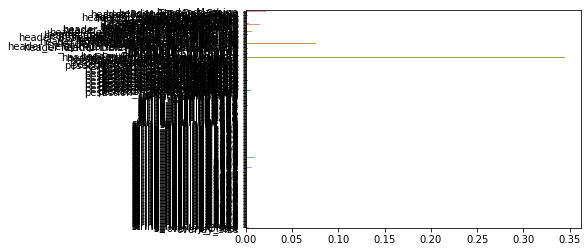

In [15]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
 
# feature별 importance 매핑
for name, value in zip(pe , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=pe)

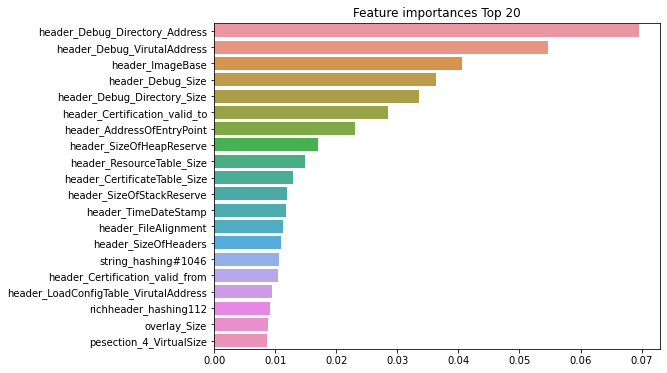

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=pe  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()